
# "Loan Prediction III. Part1. Data Exploration and Preparing" 
---
## Author Oleksandr Kursik


# 1.Define the problem

This is an data exploration [Loan Prediction III contest](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) 

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In this problem, we have to predict the Loan Status of a person based on his/ her profile.





# 2. Prepare The Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


* Read the data and and look at them

In [3]:
df = pd.read_csv('D:\\Python-projects\\LoanPrediction3\\data\\raw\\train_u6lujuX_CVtuZ9i.csv', index_col=0)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 2.1.Data Description



### 2.1.1 Describe the extent of the data that is available
Variable | Description
-------- | -------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status| Loan approved (Y/N)

### 2.1.2 Describe data that is not available but is desirable
Let’s check if the data has any missing values in numerical variables and separate this quantity by fields:

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 2.1.3. Visualize numerical data (Distribution analysis):

ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term


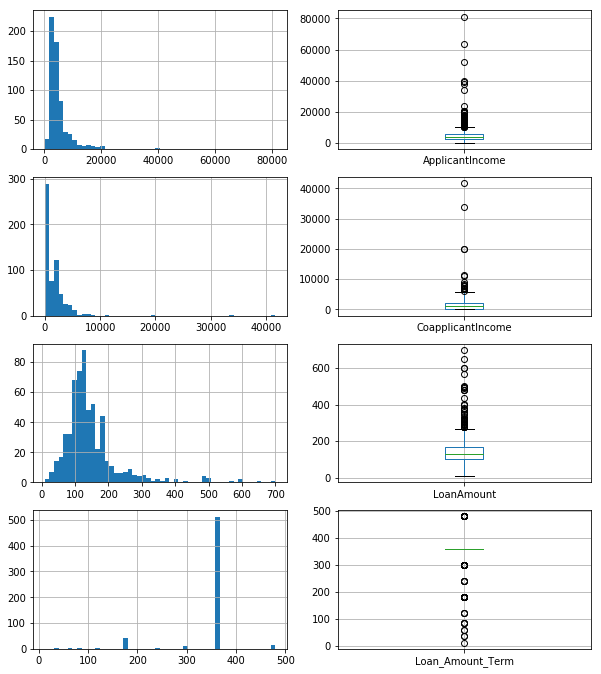

In [6]:
fig1 = plt.figure(figsize=(10,24))
ax1 = fig1.add_subplot(8,2,1)
df['ApplicantIncome'].hist(bins=50)
ax2 = fig1.add_subplot(8,2,2)
df.boxplot(column='ApplicantIncome')
ax3 = fig1.add_subplot(8,2,3)
df['CoapplicantIncome'].hist(bins=50)
ax4 = fig1.add_subplot(8,2,4)
df.boxplot(column='CoapplicantIncome')
ax5 = fig1.add_subplot(8,2,5)
df['LoanAmount'].hist(bins=50)
ax6 = fig1.add_subplot(8,2,6)
df.boxplot(column='LoanAmount')
ax7 = fig1.add_subplot(8,2,7)
df['Loan_Amount_Term'].hist(bins=50)
ax8 = fig1.add_subplot(8,2,8)
df.boxplot(column='Loan_Amount_Term')

In [17]:
g = sns.PairGrid(df)
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### 2.1.4. Categorical variable analysis: 

Gender,	Married, Dependents, Education, Self_Employed, Credit_History, Property_Area

In [13]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print ('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


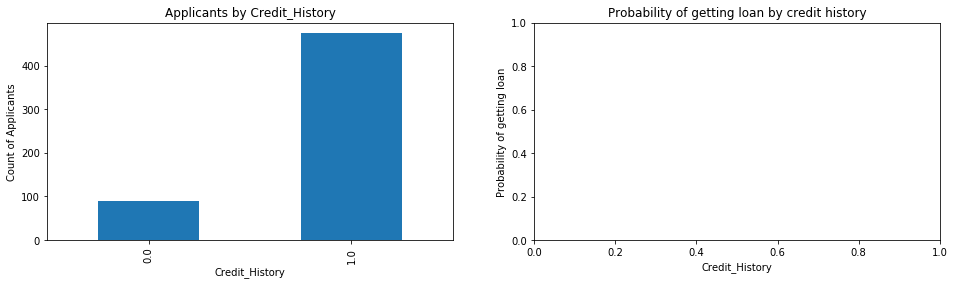

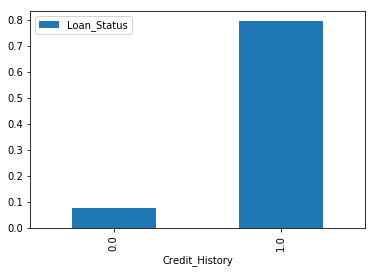

In [14]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


## 2.2 Data Processing

### 2.2.1.  Check missing values in the dataset


In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df['Gender'].fillna('No',inplace=True)